### EXERCISE 4  OF MOVIE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mov=pd.read_csv("C:/Users/anas/Desktop/MOVIE DATA/cast.zip")

In [2]:
mov.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [3]:
k = mov[(mov.character == 'Superman') | (mov.character == 'Batman')].groupby('year').character.value_counts().unstack().fillna(0)
k[k.Superman > k.Batman].Superman.count()        
                                           

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [4]:
k = mov[(mov.character == 'Superman') | (mov.character == 'Batman')].groupby('year').character.value_counts().unstack().fillna(0)
k[k.Batman > k.Superman].Batman.count()


24

In [5]:
mov[mov.character=='Superman'].character.value_counts()

Superman    42
Name: character, dtype: int64

In [6]:
mov[mov.character=='Batman'].character.value_counts()

Batman    67
Name: character, dtype: int64

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [7]:
mov.groupby(['year','type']).character.value_counts()

year  type     character                                              
1894  actor    Himself - the Director of the New York Central Railroad    1
               Mr. Hamilton                                               1
      actress  Miss Geraldine Holbrook (Miss Jerry)                       1
1899  actor    Himself                                                    5
               Himself - Audience member                                  1
                                                                         ..
2020  actress  Julia Simpson                                              1
               Miss Manga                                                 1
               Neo-Machine Agent# 2.0                                     1
2021  actor    Jake Rollins                                               1
               Russell Brown                                              1
Name: character, Length: 2211814, dtype: int64

In [8]:
mov.groupby(['year','type']).character.count()

year  type   
1894  actor       2
      actress     1
1899  actor       6
1900  actor       2
1905  actor       1
                 ..
2019  actor      43
      actress    26
2020  actor      24
      actress    13
2021  actor       2
Name: character, Length: 234, dtype: int64

In [9]:
ap=mov[(mov.type=='actor') | (mov.type=="actress")].groupby('year').type.value_counts()
ap                                                                     

year  type   
1894  actor       2
      actress     1
1899  actor       6
1900  actor       2
1905  actor       1
                 ..
2019  actor      43
      actress    26
2020  actor      24
      actress    13
2021  actor       2
Name: type, Length: 234, dtype: int64

<AxesSubplot:xlabel='year,type'>

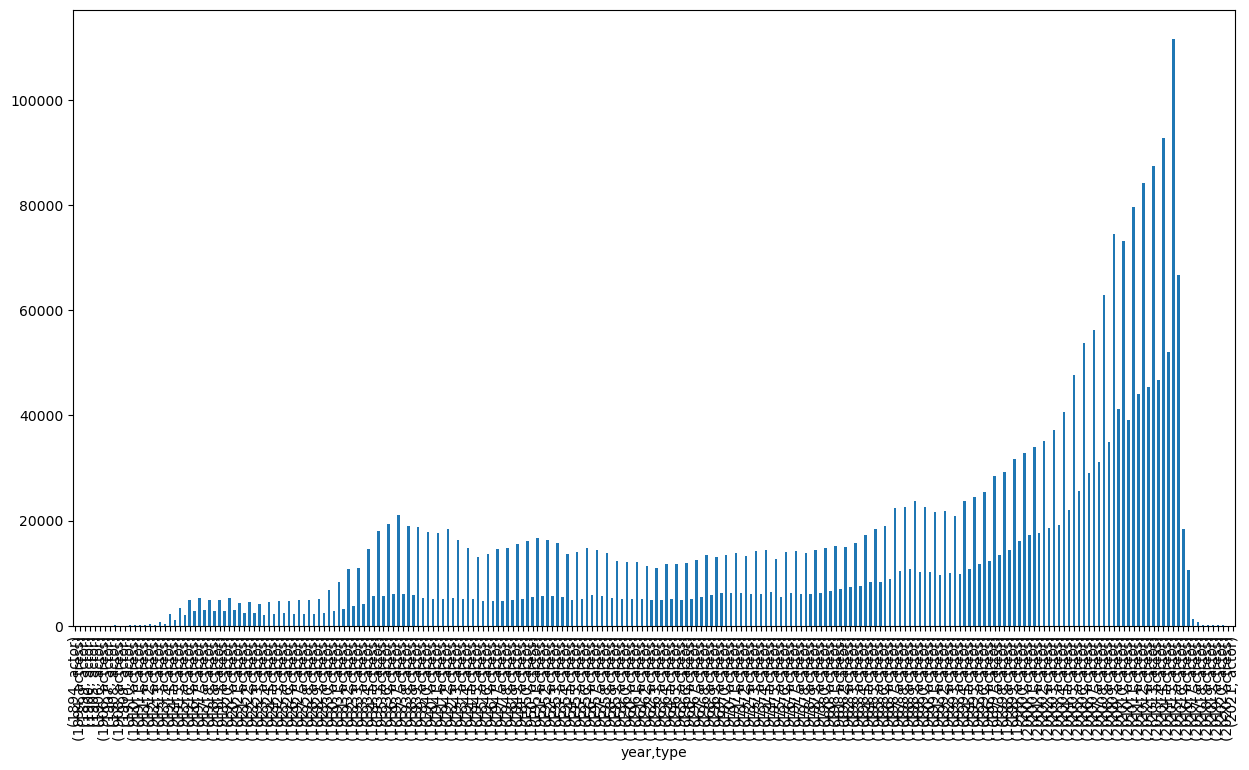

In [10]:
plt.figure(figsize=(15,8))
mov.groupby(['year','type']).character.count().plot.bar()

In [11]:
mov.groupby([mov.year//10*10,'type']).character.count()

year  type   
1890  actor           8
      actress         1
1900  actor          54
      actress        16
1910  actor       26575
      actress     15224
1920  actor       46744
      actress     23073
1930  actor      147642
      actress     48223
1940  actor      156604
      actress     49744
1950  actor      147951
      actress     53969
1960  actor      120889
      actress     52327
1970  actor      138378
      actress     60467
1980  actor      183870
      actress     85380
1990  actor      249753
      actress    118466
2000  actor      475428
      actress    256314
2010  actor      549020
      actress    305488
2020  actor          26
      actress        13
Name: character, dtype: int64

<AxesSubplot:xlabel='year,type'>

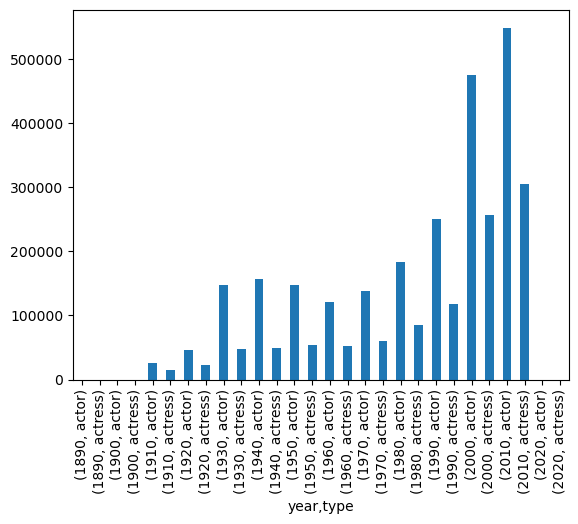

In [12]:
mov.groupby([mov.year//10*10,'type']).character.count().plot.bar()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year,type'>

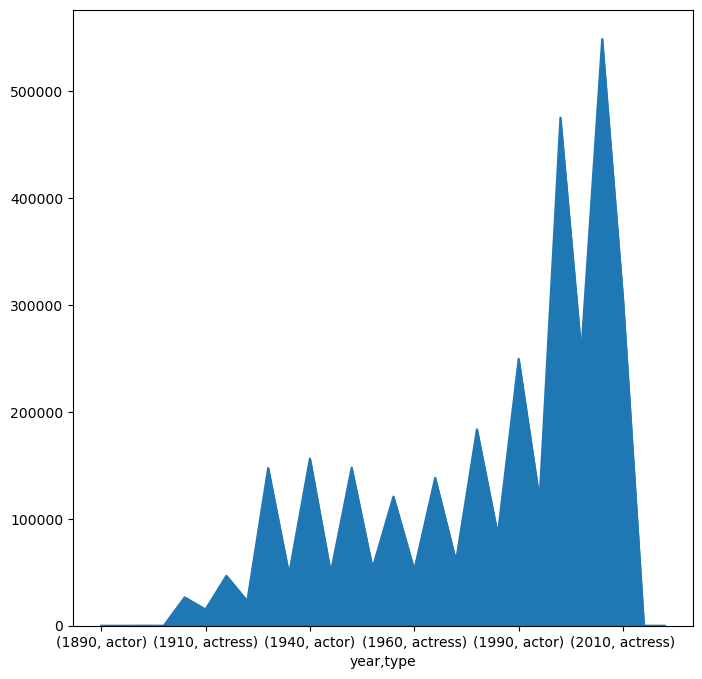

In [13]:
plt.figure(figsize=(8,8))
mov.groupby([mov.year//10*10,'type']).character.count().plot.area()

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [14]:
mov.groupby(['year','type']).character.count()

year  type   
1894  actor       2
      actress     1
1899  actor       6
1900  actor       2
1905  actor       1
                 ..
2019  actor      43
      actress    26
2020  actor      24
      actress    13
2021  actor       2
Name: character, Length: 234, dtype: int64

In [15]:
a=mov.groupby(['year','type']).character.count().unstack().fillna(0)
(a['actor']-a['actress'])


year
1894      1.0
1899      6.0
1900      2.0
1905      1.0
1906     11.0
        ...  
2017    562.0
2018     82.0
2019     17.0
2020     11.0
2021      2.0
Length: 120, dtype: float64

In [16]:
a = mov.groupby(['year','type']).size().unstack().fillna(0)
a['actor']-a['actress']

year
1894      1.0
1899      6.0
1900      2.0
1905      1.0
1906     11.0
        ...  
2017    562.0
2018     82.0
2019     17.0
2020     11.0
2021      2.0
Length: 120, dtype: float64

<AxesSubplot:xlabel='year'>

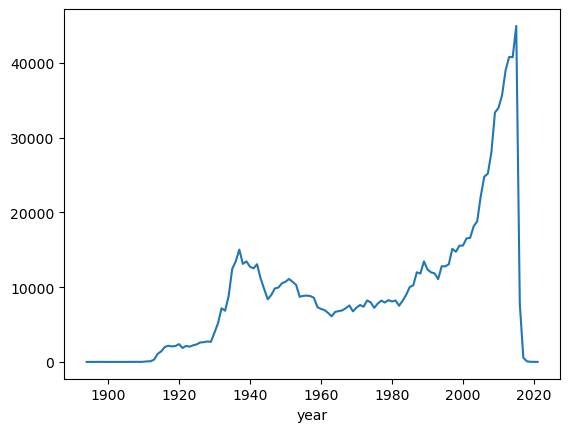

In [17]:
a=mov.groupby(['year','type']).character.count().unstack().fillna(0)
(a['actor']-a['actress']).plot.line()

<AxesSubplot:xlabel='year,type'>

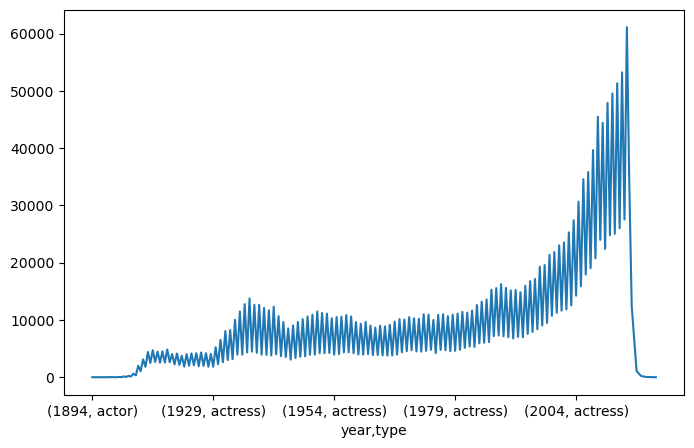

In [18]:
plt.figure(figsize=(8,5))
mov.groupby(['year','type']).character.nunique().plot.line()

In [19]:
mov[mov.type=='actor'].character.count()

2242942

In [20]:
mov[mov.type=='actress'].character.count()

1068705

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [21]:
mov.groupby(['year','type']).character.count()

year  type   
1894  actor       2
      actress     1
1899  actor       6
1900  actor       2
1905  actor       1
                 ..
2019  actor      43
      actress    26
2020  actor      24
      actress    13
2021  actor       2
Name: character, Length: 234, dtype: int64

In [22]:
a=mov.groupby(['year','type']).character.nunique().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.head()

year
1894    0.666667
1899    1.000000
1900    1.000000
1905    1.000000
1906    0.727273
dtype: float64

In [23]:
a=mov.groupby(['year']).type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.head()

year
1894    0.666667
1899    1.000000
1900    1.000000
1905    1.000000
1906    0.823529
dtype: float64

<AxesSubplot:xlabel='year'>

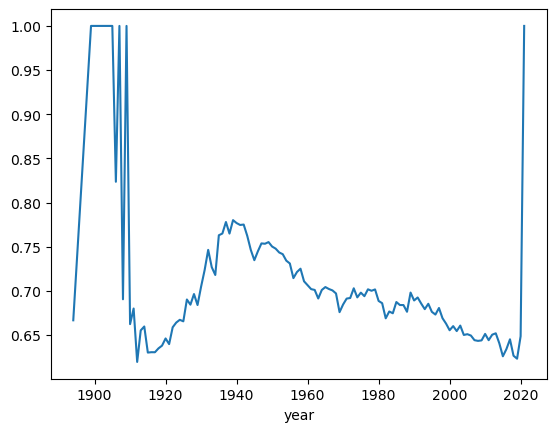

In [24]:
a=mov.groupby(['year']).type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.plot.line()

<AxesSubplot:xlabel='year'>

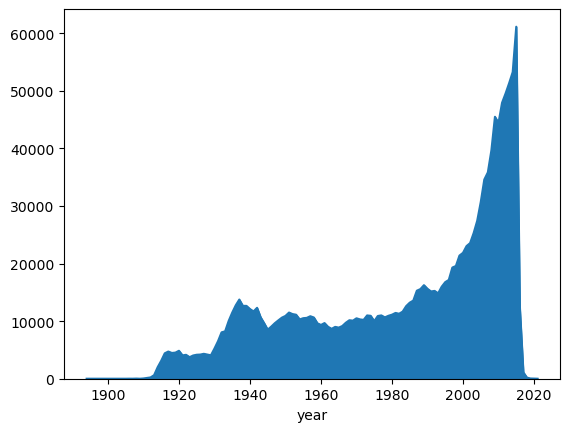

In [25]:
mov[mov.type=='actor'].groupby(['year']).character.nunique().plot.area()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

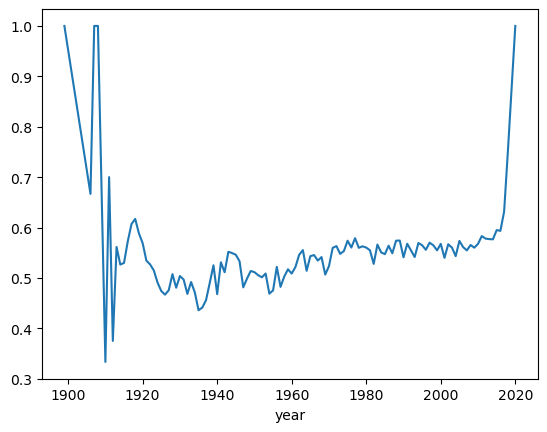

In [26]:
b=mov[(mov.n==2)].groupby(['year','type']).character.nunique().unstack().fillna(0)
total_roles=b['actor']+b['actress']
frac_roles=b['actor']/total_roles
frac_roles.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<AxesSubplot:xlabel='year'>

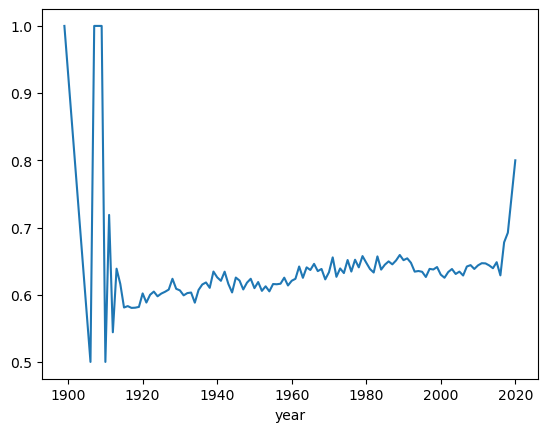

In [28]:
a=mov[(mov.n<4)].groupby(['year','type']).character.nunique().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=a['actor']/total_roles
frac_roles.plot.line()